<a href="https://colab.research.google.com/github/Slzl/Linear-regression/blob/main/Linear_Regression_Nicky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving Linear Regression - Sheet1.csv to Linear Regression - Sheet1.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
import io

In [ ]:
adv=pd.read_csv(io.BytesIO(upload['Linear Regression - Sheet1.csv']))
print(adv)

       X           Y
0      1    3.888889
1      2    4.555556
2      3    5.222222
3      4    5.888889
4      5    6.555556
..   ...         ...
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889

[300 rows x 2 columns]


In [ ]:
adv.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [ ]:
adv.shape

(300, 2)

In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [ ]:
adv.describe()

,X,Y
count,300.000000,300.000000
mean,150.500000,102.215556
std,86.746758,57.842711
min,1.000000,1.888889
25%,75.750000,52.388889
50%,150.500000,102.222222
75%,225.250000,152.055556
max,300.000000,201.888889


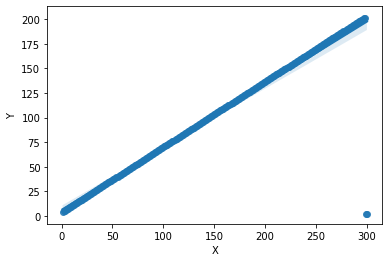

In [ ]:
sns.regplot(x='X', y='Y', data=adv)

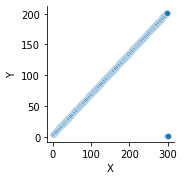

In [ ]:
sns.pairplot(data=adv, x_vars='X', y_vars='Y')

In [ ]:
adv.corr()

,X,Y
X,1.000000,0.959876
Y,0.959876,1.000000


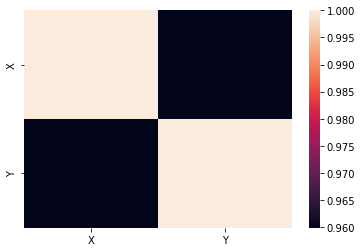

In [ ]:
sns.heatmap(adv.corr())

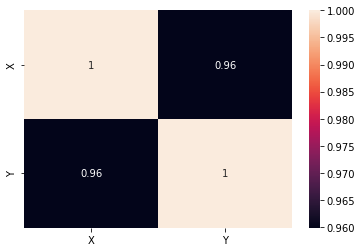

In [ ]:
sns.heatmap(adv.corr(), annot=True)

In [ ]:
X=adv['X']
y=adv['Y']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,X
283,1.0,284
97,1.0,98
275,1.0,276
262,1.0,263
132,1.0,133


In [ ]:
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.972858
X        0.628553
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1682.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          1.21e-101
Time:                        11:10:11   Log-Likelihood:                -918.92
No. Observations:                 210   AIC:                             1842.
Df Residuals:                     208   BIC:                             1849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9729      2.639      2.642      0.009       1.769      12.176
X              0.6286      0.015     41.018      0.000       0.598       0.659
==============================================================================
Omnibus:                      378.270   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80825.121
Skew:                          -9.657   Prob(JB):                         0.00
Kurtosis:                      97.150   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

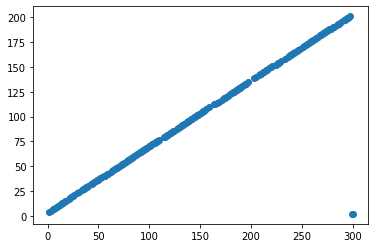

In [ ]:
plt.scatter(X_train, y_train)

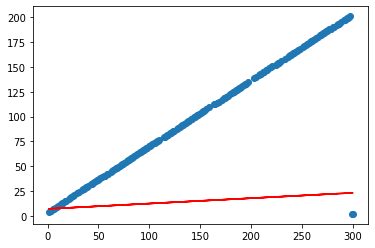

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+0.054*X_train,'r')
plt.show()

In [ ]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

283    185.481986
97      68.571078
275    180.453560
262    172.282368
132     90.570443
          ...    
66      49.085927
53      40.914734
79      57.257119
280    183.596327
8       12.629837
Length: 210, dtype: float64

In [ ]:
residual=y_train-y_train_pred
residual

283    7.073569
97    -0.015523
275    6.768662
262    6.273188
132    1.318446
         ...   
66    -1.197038
53    -1.692512
79    -0.701564
280    6.959229
8     -3.407615
Length: 210, dtype: float64

<Figure size 432x288 with 0 Axes>

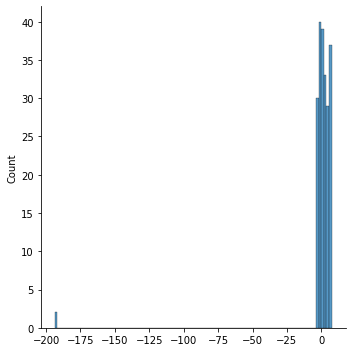

In [ ]:
plt.figure()
sns.displot(residual)

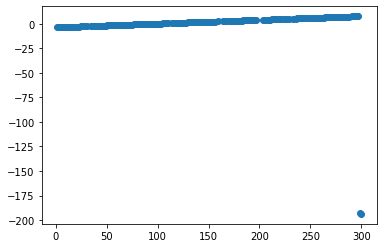

In [ ]:
plt.scatter(X_train, residual)
plt.show()